In [1]:
import vnquant.data as dt
from vnquant import plot as pl

import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import numpy as np
import pandas as pd

from utils import *
from model import *

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

from tqdm import tqdm


In [2]:
start="2013-01-30"
end="2023-12-31"

pl.vnquant_candle_stick(
    data='VND',
    title=f'VND symbol from {start} to {end}',
    xlab='Date', ylab='Price',
    start_date= start,
    end_date=end,
    data_source='VND',
    show_advanced=['volume', 'macd', 'rsi']
)

2023-11-24 21:59:36,725 : INFO : data VND from 2013-01-30 to 2023-12-31 have already cloned!


**CLONE DATA CÁC MÃ CỔ PHIẾU TỪ VNQUAT**

In [3]:
stock= SelectedStock("VCB", "2020-01-01", "2023-01-01")
stock.data = stock.data.droplevel(level='Symbols', axis=1)

2023-11-24 21:59:38,517 : INFO : data VCB from 2020-01-01 to 2023-01-01 have already cloned!


**THÔNG TIN VỀ MÃ CỔ PHIẾU ĐƯỢC CLONE**

stock_VCB

In [4]:
stock.stock_infor(5)
stock.stock_chart()


Attributes  high   low  open  close    avg    volume
2020-01-02  91.4  89.7  90.2   90.8  90.68  386290.0
2020-01-03  91.8  89.9  91.5   89.9  90.81  536130.0
2020-01-04   NaN   NaN   NaN    NaN    NaN       NaN
2020-01-05   NaN   NaN   NaN    NaN    NaN       NaN
2020-01-06  89.5  87.5  89.2   87.5  88.54  880110.0
stock VCB is OHLC: 'True' and OHLCV: 'True'


**TRỰC QUAN HÓA CÁC CỘT DỮ LIỆU TRONG DATA**

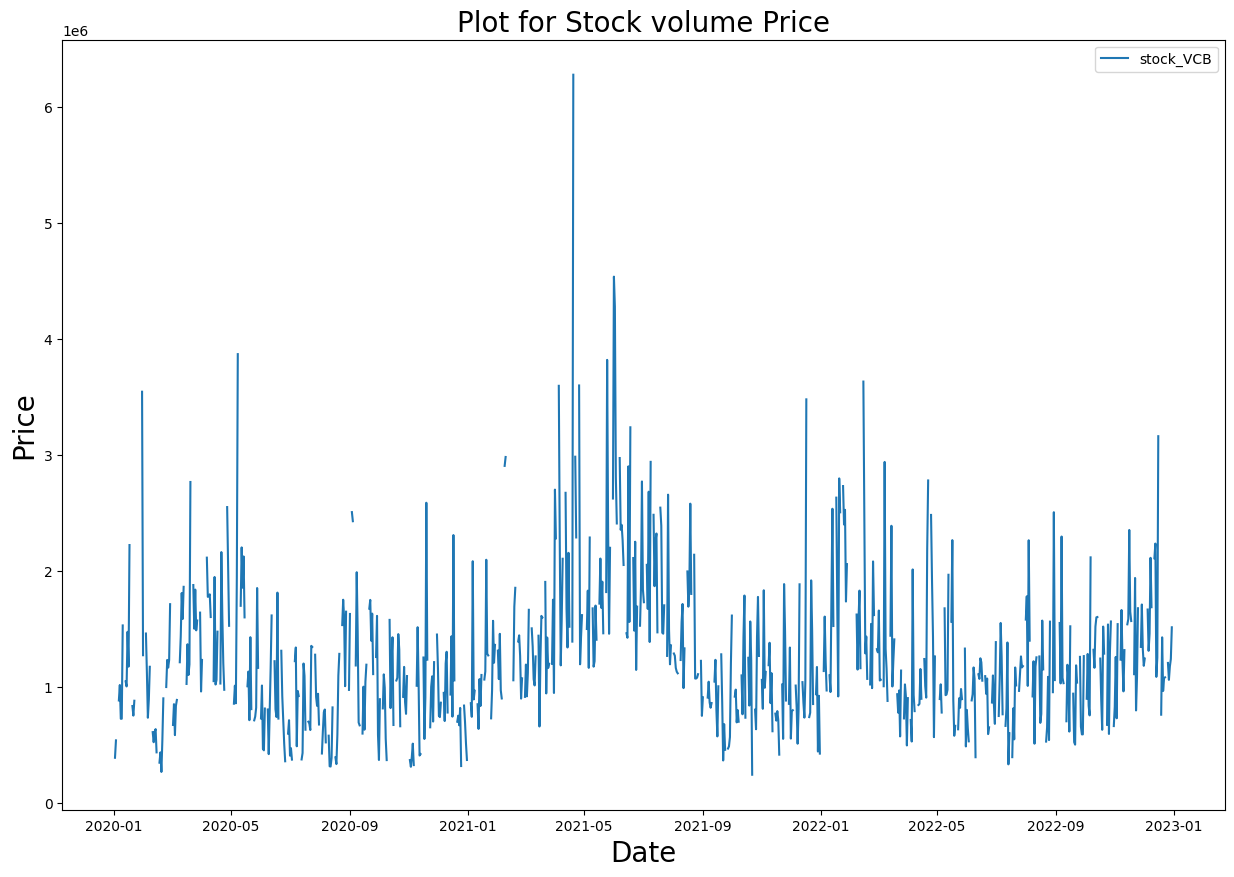

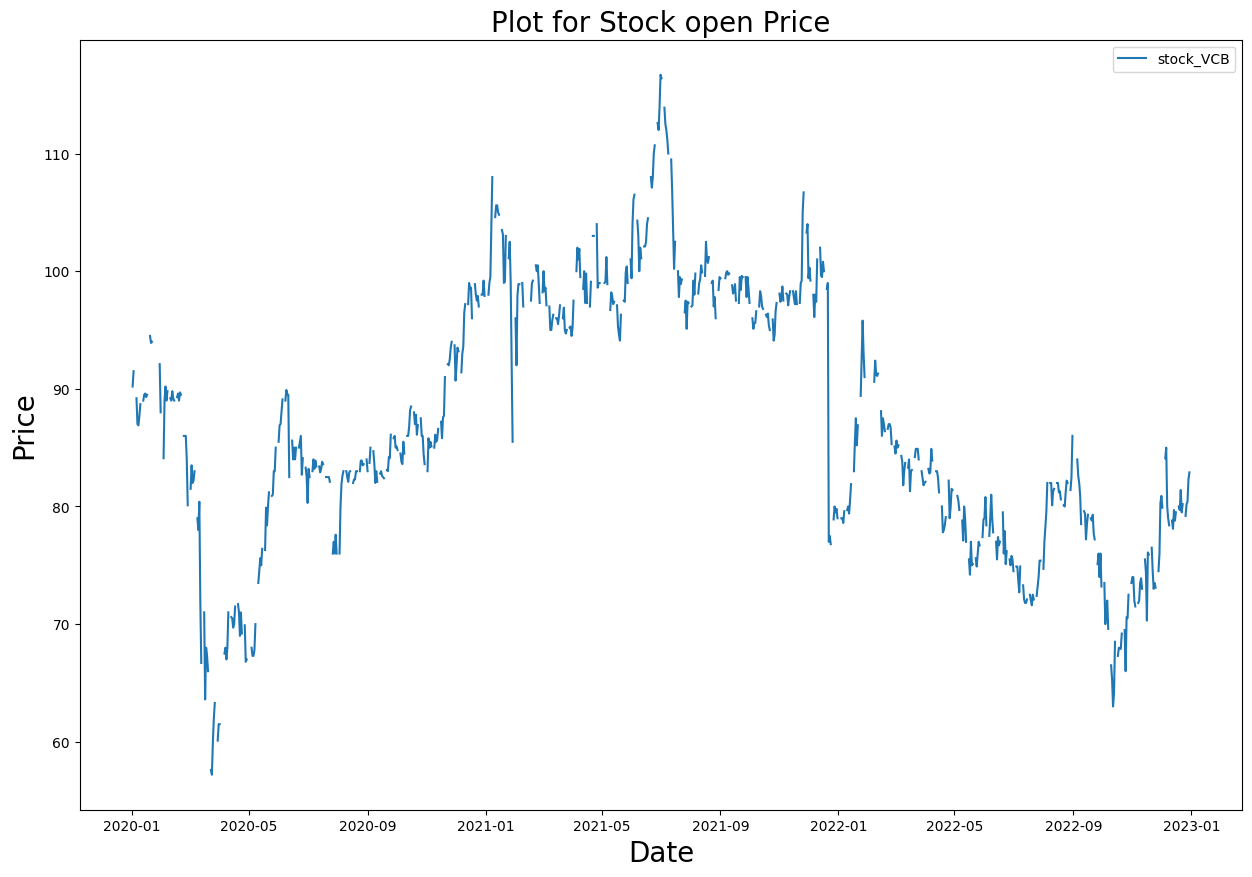

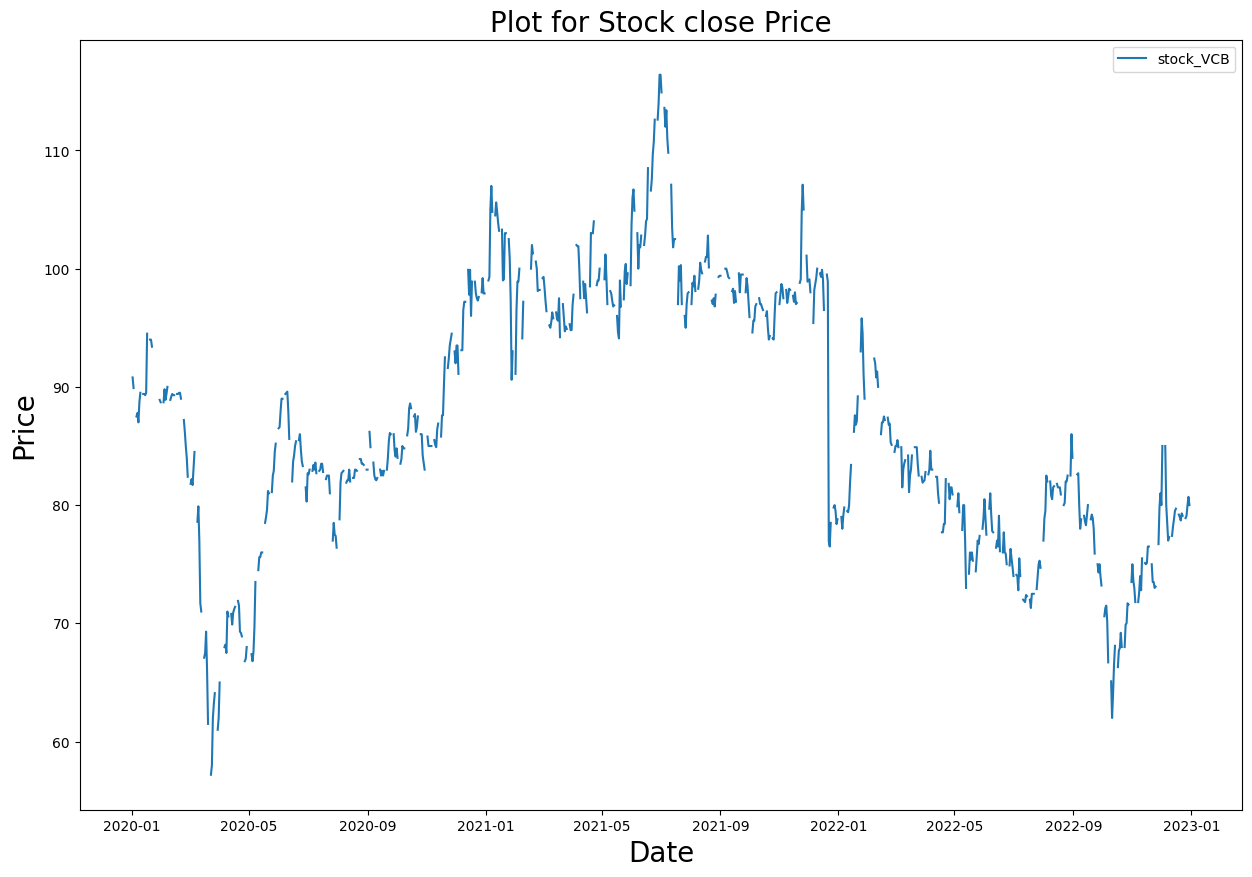

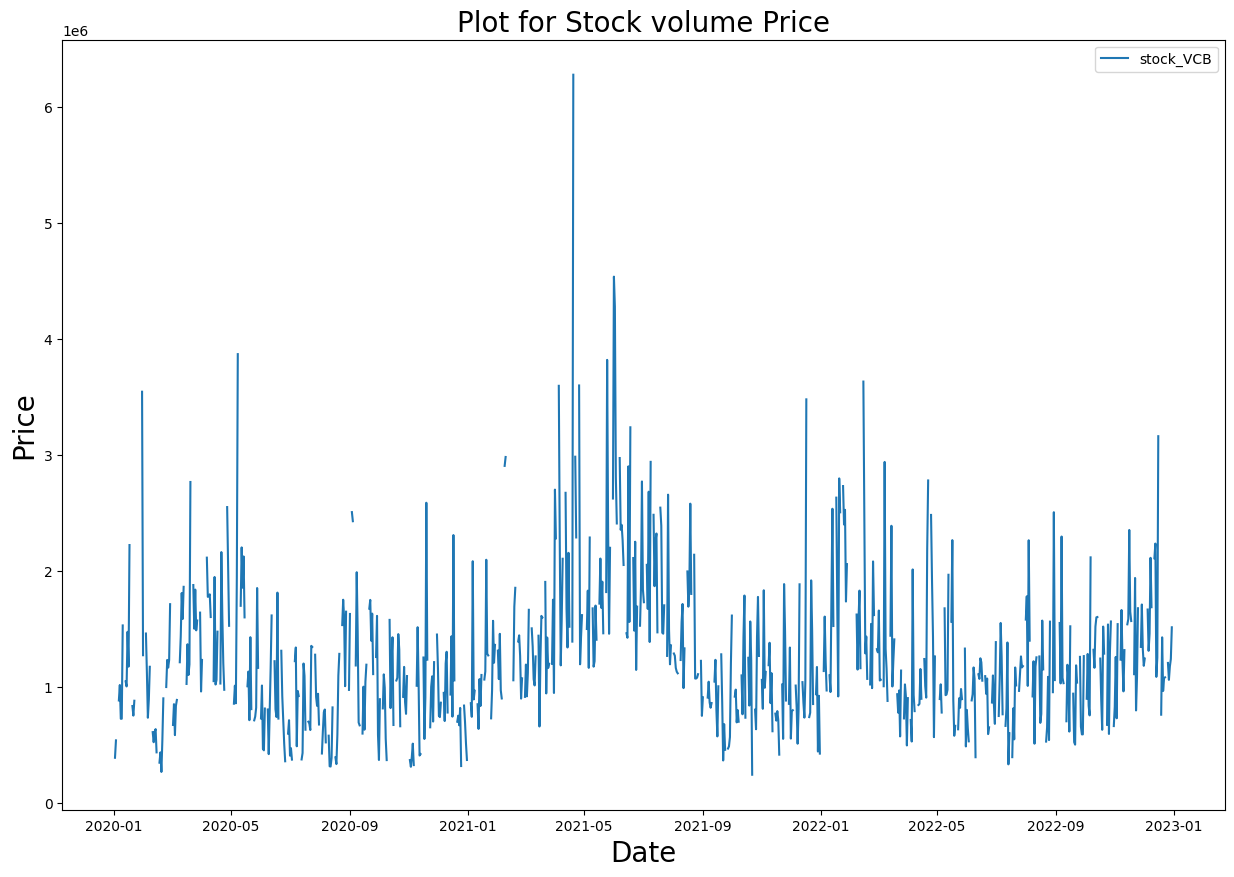

In [5]:
stocks = {
    'stock_VCB': stock.data 
}

stockchart.plot_prices('open',stocks)
stockchart.plot_prices('close',stocks)
stockchart.plot_prices('volume',stocks)

In [6]:
# stock_VCB.data.iloc[1] = np.nan
stock.data.interpolate(method='quadratic', limit_direction='forward',limit_area='inside', axis=0, inplace=True)
stock.data.head()

Attributes,high,low,open,close,avg,volume
2020-01-02,91.400000,89.700000,90.200000,90.800000,90.680000,386290.000000
2020-01-03,91.800000,89.900000,91.500000,89.900000,90.810000,536130.000000
2020-01-04,91.616747,89.739855,91.742339,88.838842,90.630894,647156.642384
2020-01-05,90.850186,89.126328,90.943236,87.757298,90.053197,733518.832228
2020-01-06,89.500000,87.500000,89.200000,87.500000,88.540000,880110.000000


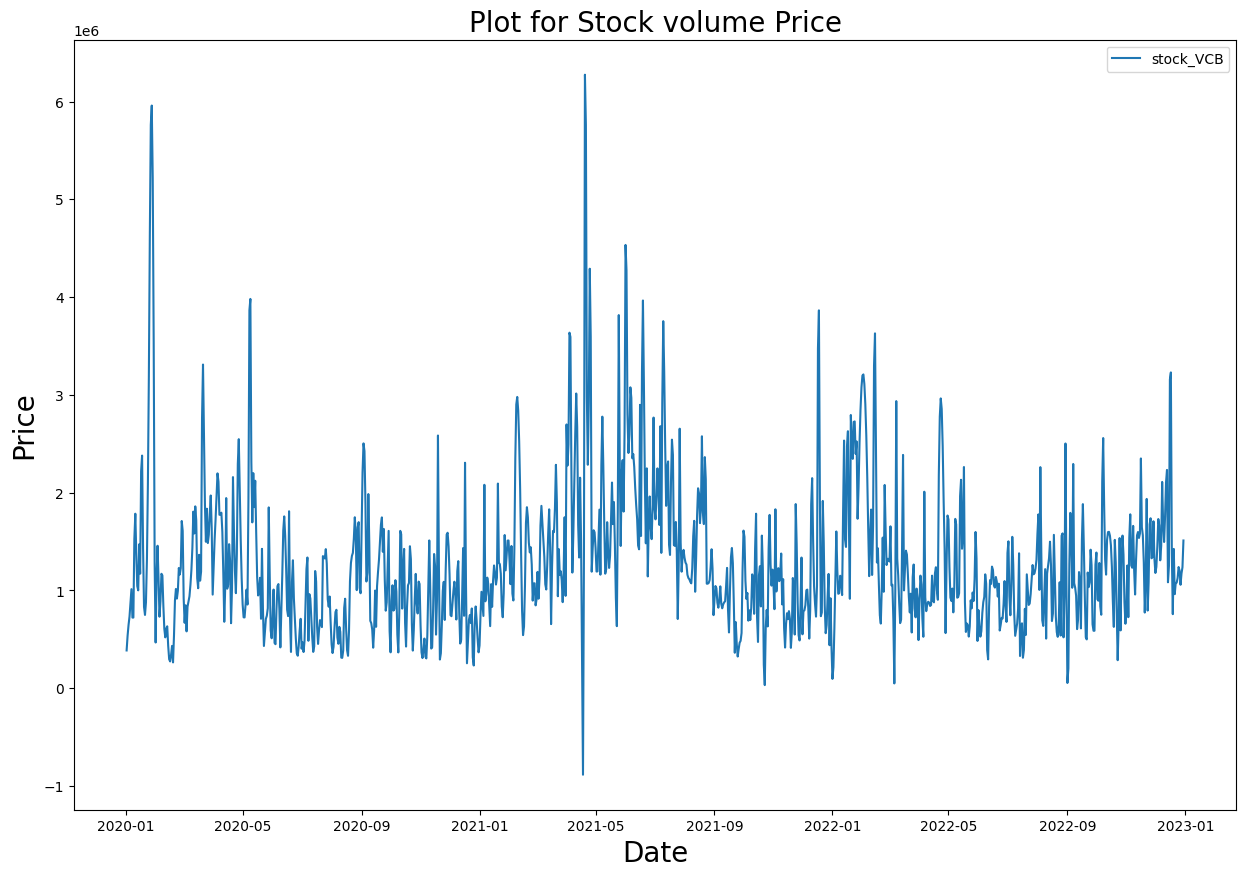

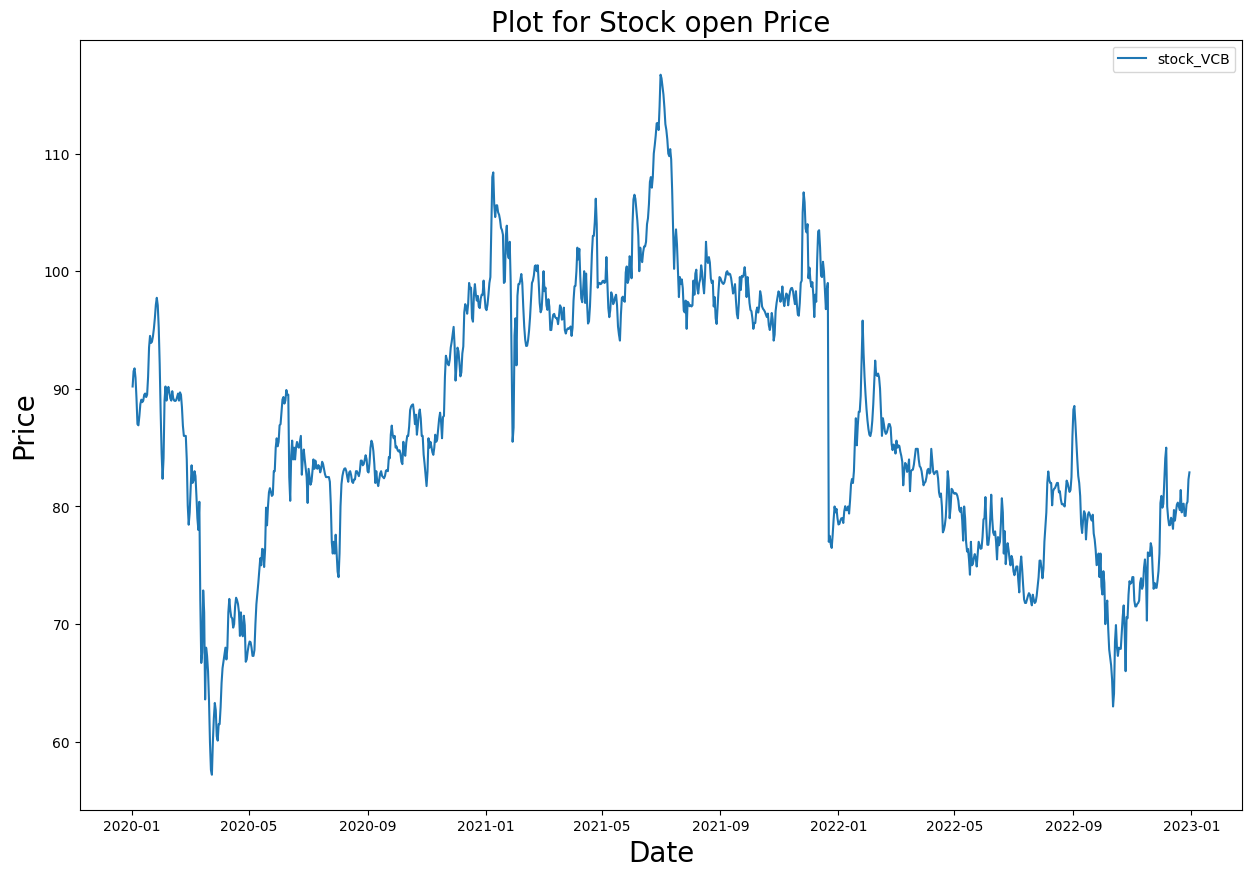

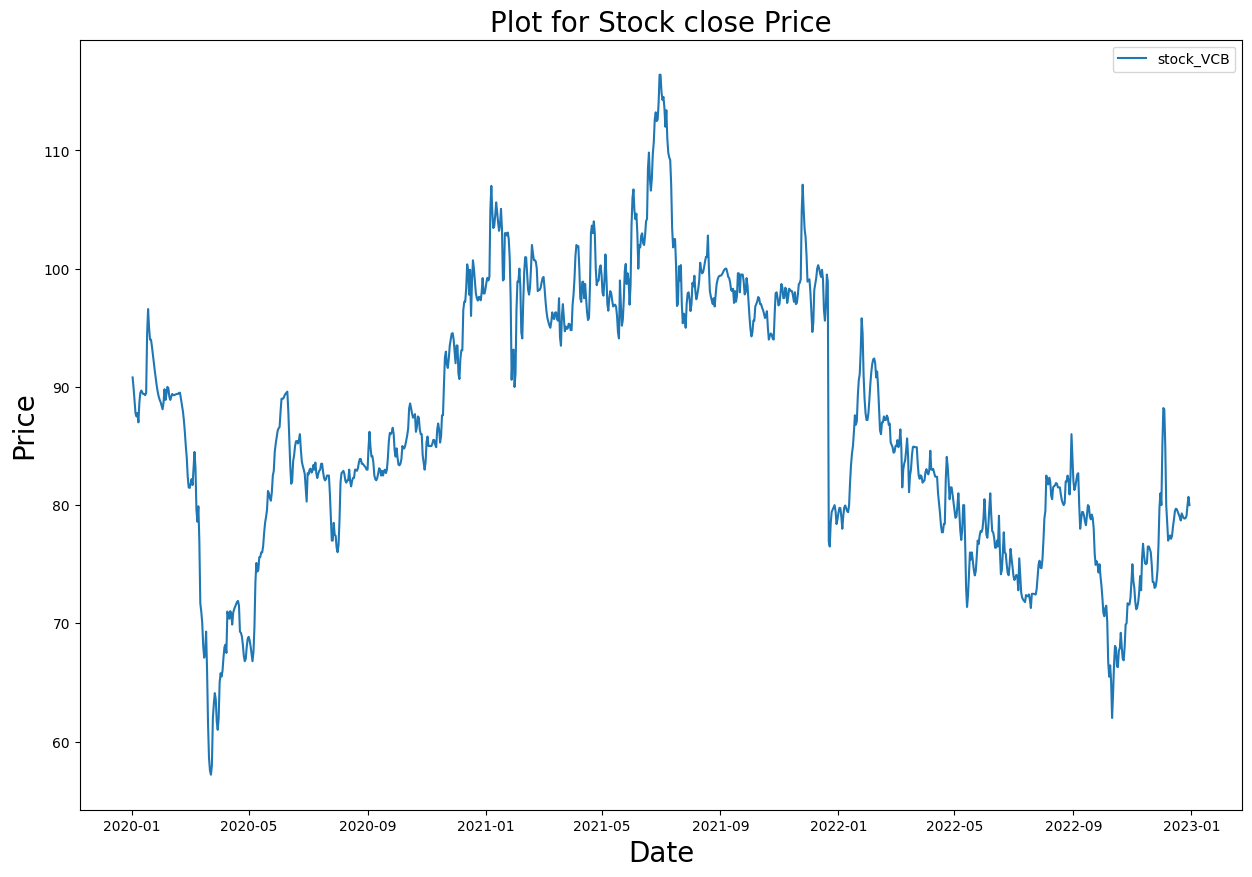

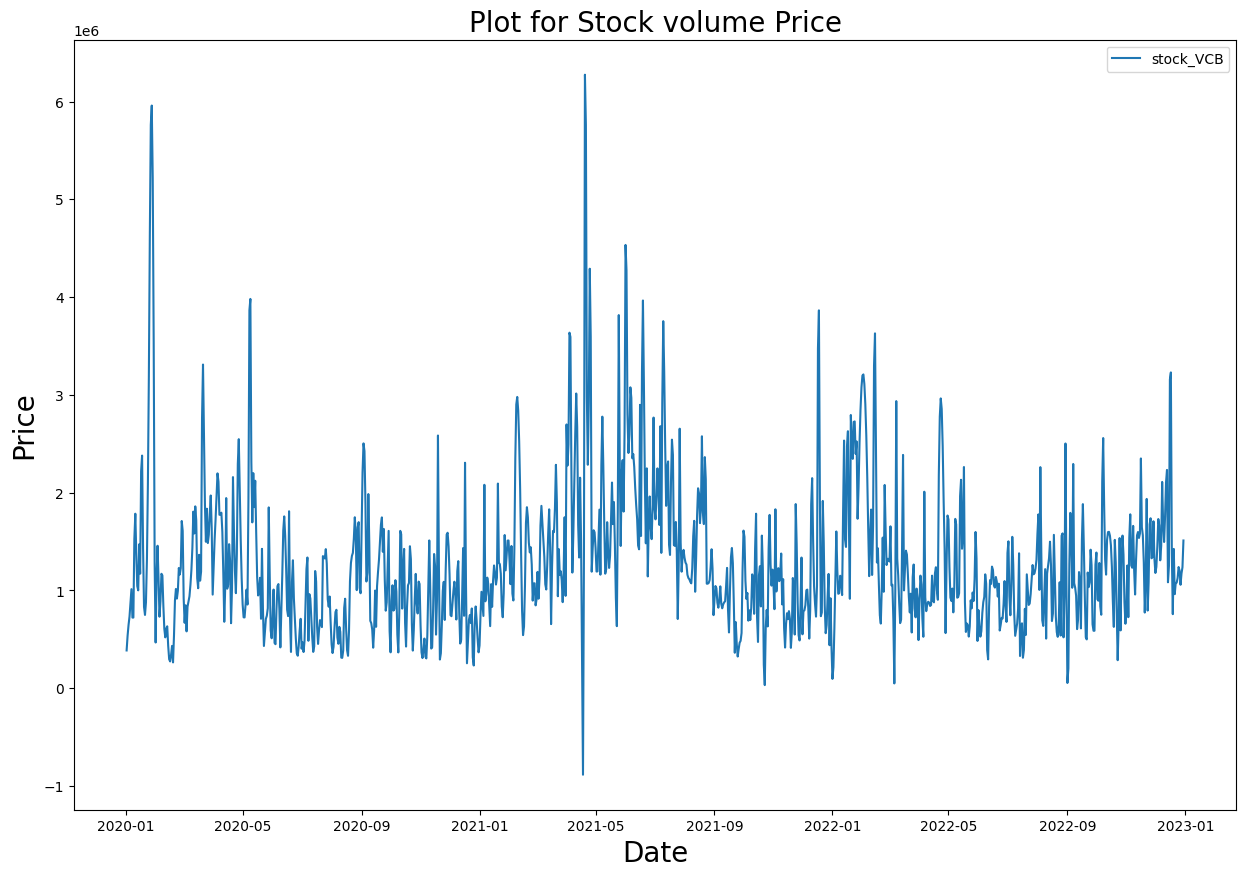

In [7]:
stocks = {
    'stock_VCB': stock.data 
}

stockchart.plot_prices('open',stocks)
stockchart.plot_prices('close',stocks)
stockchart.plot_prices('volume',stocks)

**TIẾN HÀNH TÍNH TOÁN CÁC THÔNG SỐ**

stock_VCB

In [8]:
stock_copy = stock.data.copy()
stock_calculate = StockAnalysis(stock_copy)
stock_calculate.calculate_moving_average(window=50)
stock_calculate.calculate_rsi(window=14)
stock_calculate.calculate_bollinger_bands(window=20)
stock_calculate.calculate_macd(short_window=12, long_window=26)
stock_calculate.calculate_daily_returns()
# stock_calculate.calculate_percent_daily_returns()
# stock_calculate.calculate_cumulative_returns()


stock_sharpe_ratio = stock_calculate.calculate_sharpe_ratio(4)
stock_gains,stock_losses=stock_calculate.calculate_total_gains_and_losses()
print(f"sharpe_ratio : {stock_sharpe_ratio }")
print(f"total_gains_and_losses: {stock_gains} and {stock_losses}")
stock_calculate.data = stock_calculate.data.iloc[1:]
print(stock_calculate.data.head(5))

sharpe_ratio : -3791.769056322359
total_gains_and_losses: 5.681040185967895 and -5.807672836901263
Attributes       high        low       open      close        avg  \
2020-01-03  91.800000  89.900000  91.500000  89.900000  90.810000   
2020-01-04  91.616747  89.739855  91.742339  88.838842  90.630894   
2020-01-05  90.850186  89.126328  90.943236  87.757298  90.053197   
2020-01-06  89.500000  87.500000  89.200000  87.500000  88.540000   
2020-01-07  87.900000  85.400000  87.000000  87.800000  86.540000   

Attributes        volume  Moving_Average_50  RSI_14  Upper_Bollinger_Band_20  \
2020-01-03  5.361300e+05                NaN     NaN                      NaN   
2020-01-04  6.471566e+05                NaN     NaN                      NaN   
2020-01-05  7.335188e+05                NaN     NaN                      NaN   
2020-01-06  8.801100e+05                NaN     NaN                      NaN   
2020-01-07  1.013270e+06                NaN     NaN                      NaN   

Attri

In [9]:
stock_calculate.data.info()
stock_calculate.data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1093 entries, 2020-01-03 to 2022-12-30
Freq: D
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   high                     1093 non-null   float64
 1   low                      1093 non-null   float64
 2   open                     1093 non-null   float64
 3   close                    1093 non-null   float64
 4   avg                      1093 non-null   float64
 5   volume                   1093 non-null   float64
 6   Moving_Average_50        1045 non-null   float64
 7   RSI_14                   1081 non-null   float64
 8   Upper_Bollinger_Band_20  1075 non-null   float64
 9   Lower_Bollinger_Band_20  1075 non-null   float64
 10  MACD_12_26               1093 non-null   float64
 11  Signal_Line_12_26        1093 non-null   float64
 12  Daily_Returns            1093 non-null   float64
dtypes: float64(13)
memory usage: 119.5 KB


Attributes
high                        0
low                         0
open                        0
close                       0
avg                         0
volume                      0
Moving_Average_50          48
RSI_14                     12
Upper_Bollinger_Band_20    18
Lower_Bollinger_Band_20    18
MACD_12_26                  0
Signal_Line_12_26           0
Daily_Returns               0
dtype: int64

In [10]:
stock_calculate.data.describe()

Attributes,high,low,open,close,avg,volume,Moving_Average_50,RSI_14,Upper_Bollinger_Band_20,Lower_Bollinger_Band_20,MACD_12_26,Signal_Line_12_26,Daily_Returns
count,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1.093000e+03,1045.000000,1081.000000,1075.000000,1075.000000,1093.000000,1093.000000,1093.000000
mean,88.138701,85.931870,87.087614,87.060229,87.021454,1.295693e+06,87.179287,50.399275,91.846428,82.377735,-0.077460,-0.079011,-0.000116
std,10.969349,10.822531,10.956878,10.975171,10.887664,7.589420e+05,10.306992,19.487010,11.080301,11.154505,1.564908,1.453099,0.016747
min,58.400000,56.600000,57.200000,57.200000,57.270000,-8.845789e+05,66.869202,0.000000,69.972747,51.899754,-6.772845,-5.859511,-0.251603
25%,80.500000,78.415086,79.500000,79.300000,79.270000,8.083000e+05,78.636642,37.614679,84.167521,74.274337,-0.685303,-0.664341,-0.006889
50%,86.141871,84.700000,85.300000,85.400000,85.330000,1.150100e+06,85.406614,49.581555,89.718148,81.602133,-0.065955,-0.086206,0.000000
75%,98.200000,96.270464,97.102071,97.200000,97.240000,1.582400e+06,97.751313,64.734451,100.902493,93.638291,0.778935,0.716099,0.006947
max,117.200000,115.000000,116.700000,116.400000,116.120000,6.274200e+06,107.007839,100.000000,121.177685,107.501784,3.711250,3.542962,0.066691


**KHỞI TẠO CHUỖI LỢI XUẤT THAY CHO VIỆC DỰ ĐOÁN CHUỖI GIÁ ĐÓNG**

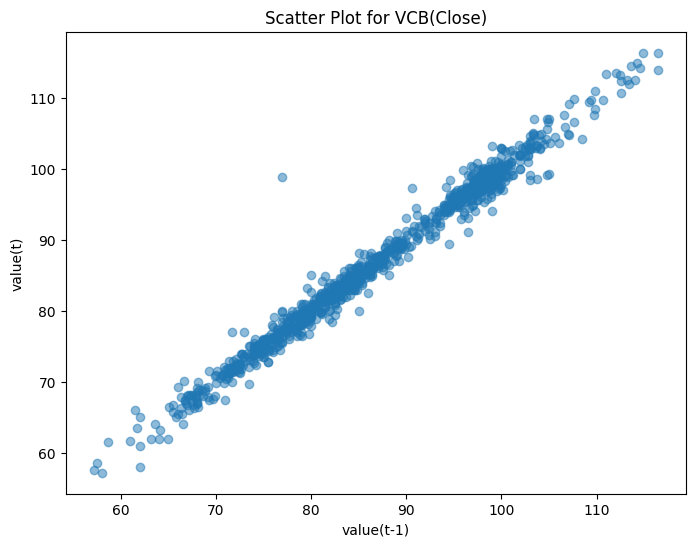

In [11]:
stockchart.plot_scatter('close',stock_calculate.data,"VCB")

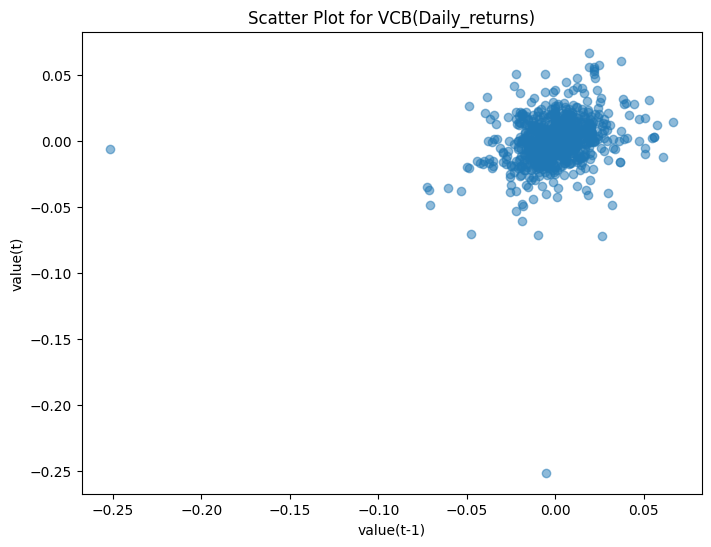

In [12]:
stockchart.plot_scatter('Daily_Returns',stock_calculate.data,"VCB")

**XÁC ĐỊNH LOẠI BỎ GIÁ TRỊ NGOẠI LAI**

VCB

1093


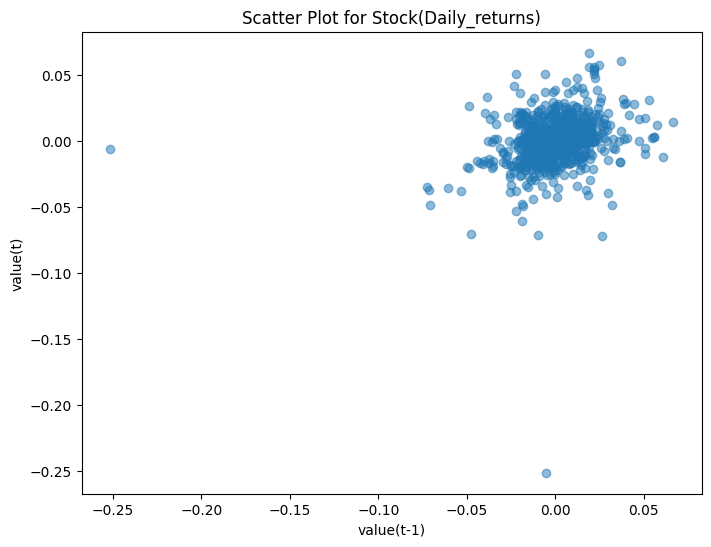

In [13]:
print(len(stock_calculate.data))
stockchart.plot_scatter('Daily_Returns',stock_calculate.data,"Stock")


Đã loại bỏ 5 phần tử
1088


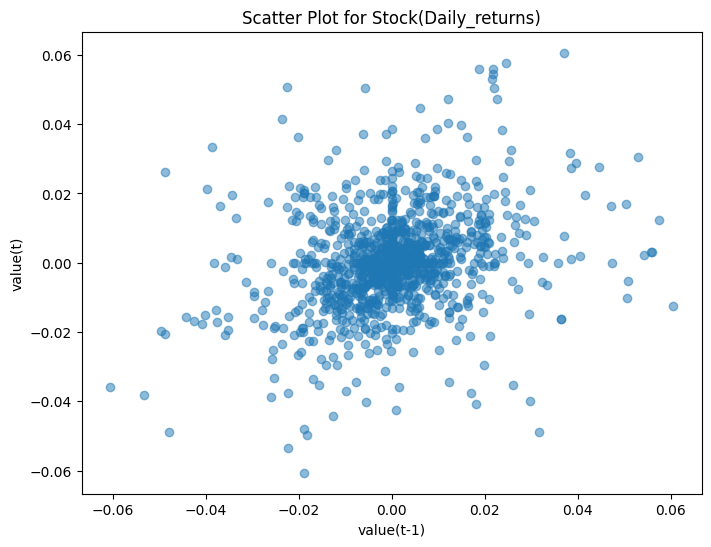

In [14]:
stock_cleaned , i = remove_outliers_IQR(stock_calculate.data,"Daily_Returns",4)

has_nan = stock_cleaned["Daily_Returns"].isna()
stock_cleaned = stock_cleaned[~has_nan]

print(len(stock_cleaned))
stockchart.plot_scatter('Daily_Returns',stock_cleaned,"Stock")

In [15]:
# import pandas as pd
# full_date_rng =  pd.date_range(start=stock_cleaned.index[0], end=stock_cleaned.index[-1], freq='D')
# df = stock_cleaned.reindex(full_date_rng)
# print(df.isna().sum())

**TRỰC QUAN HÓA PHÂN BỔ XÁC XUẤT CỦA CHUỖI LỢI XUẤT**

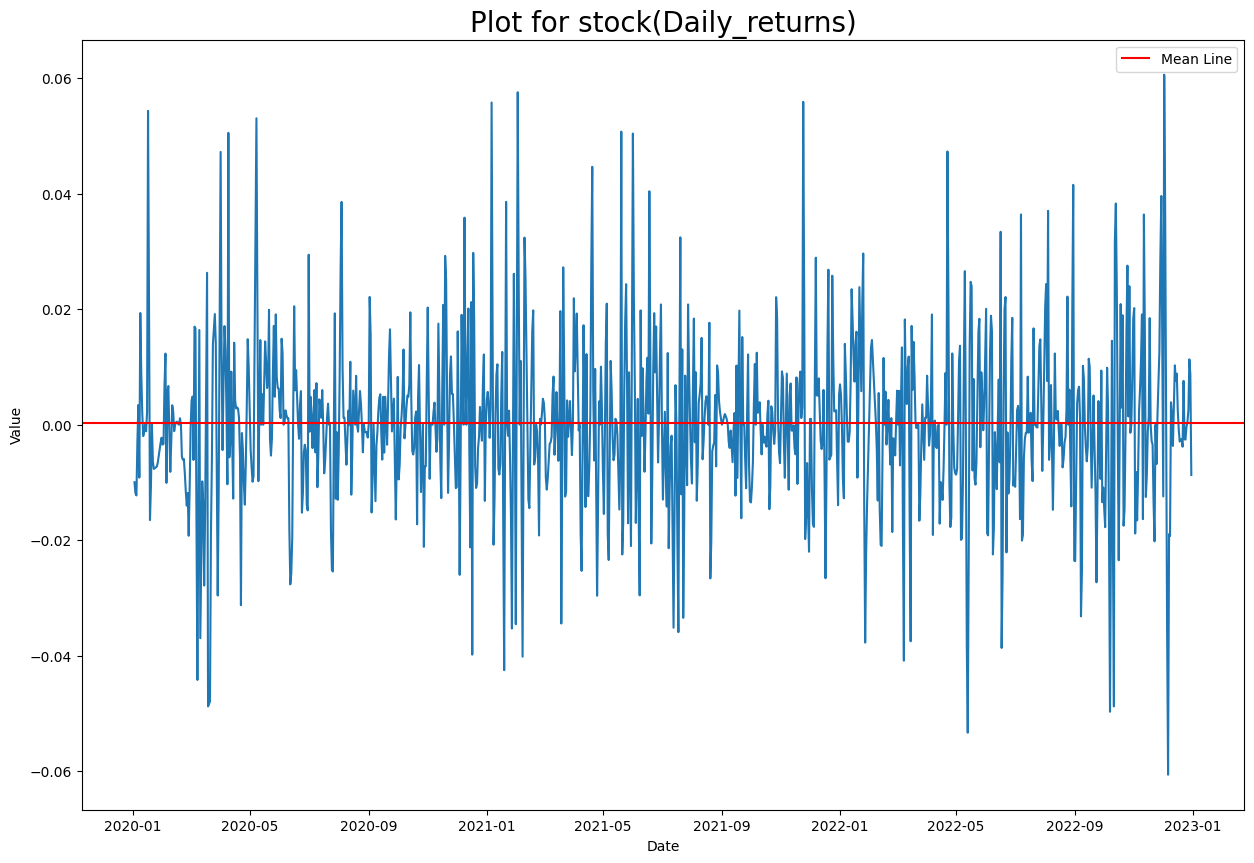

In [16]:
stocks = {
    'stock': stock_cleaned
}
# multi_chart_KDE = MultiStockChart(stocks)
stockchart.plot_ultimate('Daily_Returns',stocks)

**CHECKING CHỈ SỐ AIC (ĐIỀU KIỆN CHỌN CHUỖI TIME  SERIES CÓ P<0.05)**

Results of Argument dickey fuller test VCB:
Test Statistics                 -25.462815
p-value                           0.000000
No. of lags used                  1.000000
Number of observations used    1086.000000
critical value (1%)              -3.436386
critical value (5%)              -2.864205
critical value (10%)             -2.568189
dtype: float64


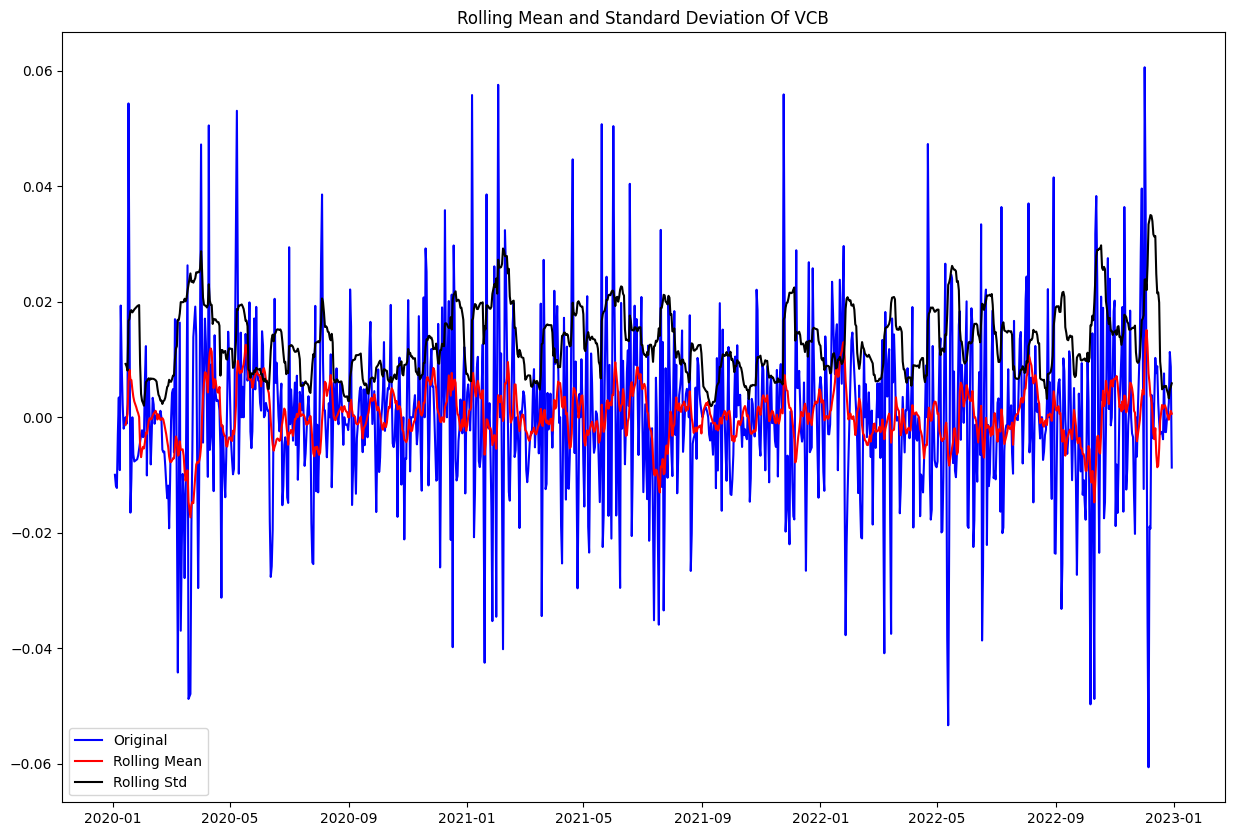

In [17]:
i ,o= test_stationarity(stock_cleaned['Daily_Returns'],"VCB")
i
o

**BIEU DO ACF & PACF**

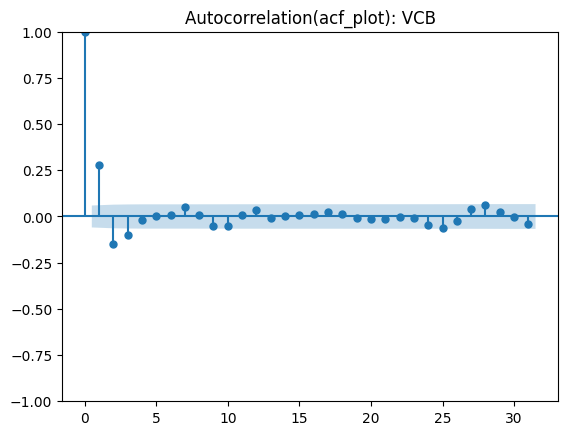

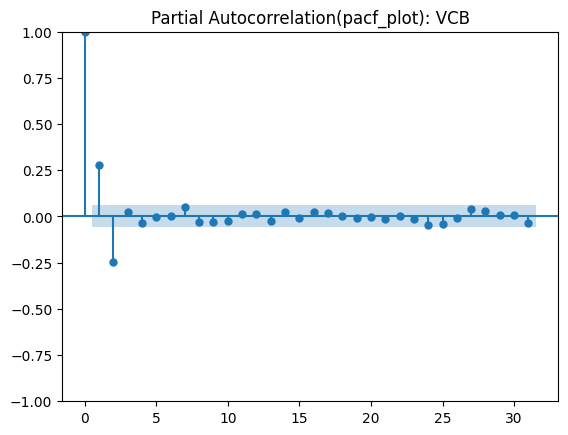

In [18]:
acf_plot, pacf_plot = acf_pacf_plot(stock_cleaned['Daily_Returns'], "VCB")

**CHIA DU LIEU**

In [19]:
train_data, test_data =  train_test_split(stock_cleaned)
train_arima = train_data['Daily_Returns']
test_arima = test_data['Daily_Returns']

**AUTO FIND BEST P, D, Q**

In [20]:
import pmdarima as pm
import warnings
warnings.filterwarnings("ignore")
model = pm.auto_arima(train_arima,start_p=0, start_q=0,d=1, max_p=5,  max_q=5,
                           seasonal=False,
                           trace=True,
                           error_action='ignore',  
                           suppress_warnings=True,stepwise=True
                           )
# make your forecasts
model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-5212.064, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-5252.402, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.83 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-5214.064, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-5419.434, Time=0.30 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-5472.060, Time=0.33 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-5514.480, Time=0.24 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-5557.621, Time=0.36 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-5647.530, Time=1.84 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-5659.179, Time=1.92 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-5629.694, Time=1.36 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-5644.623, Time=2.08 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-5618.324, Time=1.52 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-5625.885, Time=2.05 sec
 ARIMA(4,1,1)(0,0,0)[0]  

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  979
Model:               SARIMAX(4, 1, 1)   Log Likelihood                2836.589
Date:                Fri, 24 Nov 2023   AIC                          -5659.179
Time:                        22:00:00   BIC                          -5624.980
Sample:                             0   HQIC                         -5646.167
                                - 979                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -5.493e-06   4.55e-05     -0.121      0.904   -9.46e-05    8.36e-05
ar.L1          0.2587      0.031      8.416      0.000       0.198       0.319
ar.L2         -0.2421      0.036     -6.673      0.000      -0.313      -0.171
ar.L3          0.0034      0.034      0.102      0.919      -0.063       0.070
ar.L4          0.0206      0.043      0.484      0.628      -0.063       0.104
ma.L1         -0.8963      0.026    -34.097      0.000      -0.948      -0.845
sigma2         0.0002   5.33e-06     33.148      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.86   Jarque-Bera (JB):               328.44
Prob(Q):                              0.35   Prob(JB):                         0.00
Heteroskedasticity (H):               1.24   Skew:                             0.33
Prob(H) (two-sided):                  0.06   Kurtosis:                         5.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**MANUAL FIND BEST P, D, Q**

In [21]:
import itertools
p  = q = range(0,3)
d = [1]
pdq_combinations = list(itertools.product(p, d, q))
pdq_combinations

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2)]

**MO HINH ARIMA**

In [30]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

history = [x for x in train_arima]
y = test_arima
def arima_model(history,y, order=(1,1,0)):
    predictions = list()
    for i in tqdm(range(0, len(y))):
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        result = model_fit.forecast()[0]
        predictions.append(result)
        obs = y[i]
        history.append(obs)
    report_model = model_fit.summary()
    report_df = pd.DataFrame(report_model.tables[1])
    return predictions,report_model
predictions,report = arima_model(history,y, order=(1,1,0))

100%|██████████| 109/109 [00:10<00:00,  9.99it/s]


In [31]:
report

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1087
Model:                 ARIMA(1, 1, 0)   Log Likelihood                2894.629
Date:                Fri, 24 Nov 2023   AIC                          -5785.257
Time:                        22:55:43   BIC                          -5775.277
Sample:                             0   HQIC                         -5781.479
                               - 1087                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2008      0.021     -9.497      0.000      -0.242      -0.159
sigma2         0.0003   8.58e-06     33.009      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   6.69   Jarque-Bera (JB):               226.08
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               1.42   Skew:                             0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

  0%|          | 0/109 [00:00<?, ?it/s]


ValueError: x and y must have same first dimension, but have shapes (109,) and (1,)

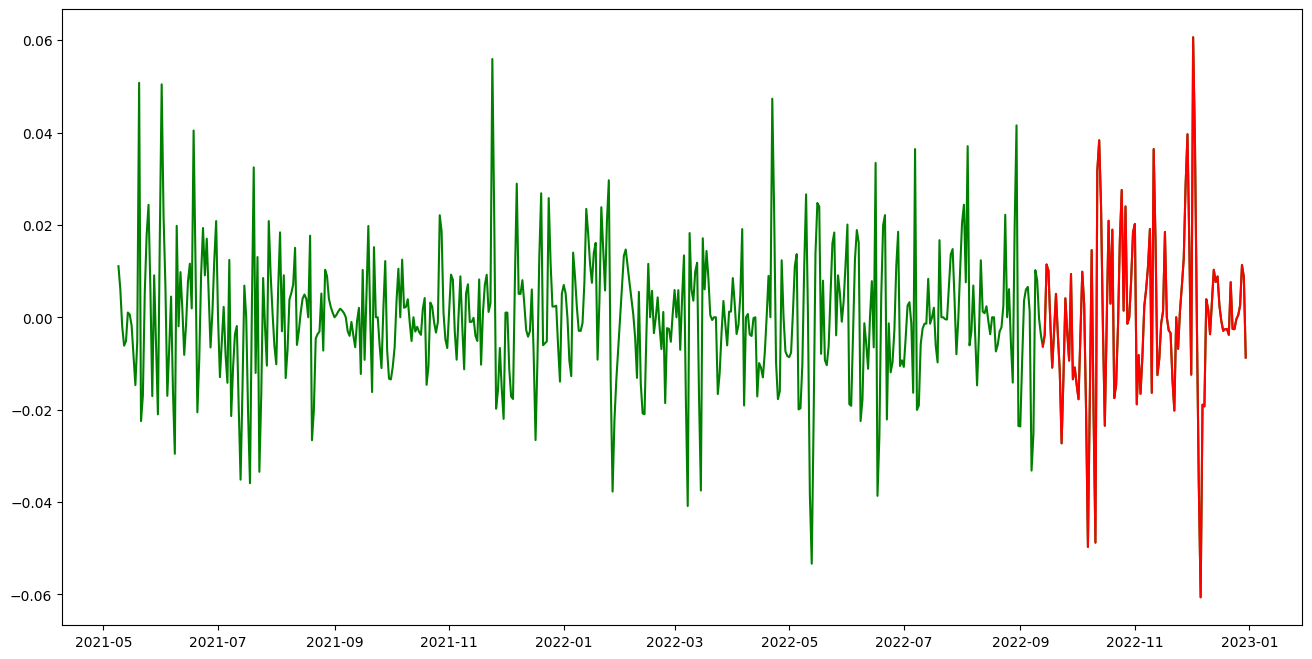

In [ ]:
visualization_result(test_data['Daily_Returns'],predictions,stock_cleaned['Daily_Returns'],title ="Returns",save="arima_model_returns.pdf")


In [ ]:
# train_arima = train_data['Daily_Returns']
# test_arima = test_data['Daily_Returns']
mse = mean_squared_error( test_data['Daily_Returns'], predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data['Daily_Returns'], predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data['Daily_Returns'], predictions))
print('RMSE: '+str(rmse))
r2 = r2_score(test_data['Daily_Returns'], predictions)
print('R-squared: '+str(r2))

MSE: 0.0003986913102531562
MAE: 0.014569999405044318
RMSE: 0.019967255952011938
R-squared: -0.24143060889384138


In [ ]:
result_df = evaluate_model(test_data['Daily_Returns'], predictions)
print(result_df)


      Metric     Value
0        MSE  0.000399
1        MAE  0.014570
2       RMSE  0.019967
3  R-squared -0.241431


In [ ]:
date_minus_one_day = train_arima.index[-1]
predictions_close = stock_cleaned["close"].loc[date_minus_one_day]*np.exp(np.cumsum(predictions))

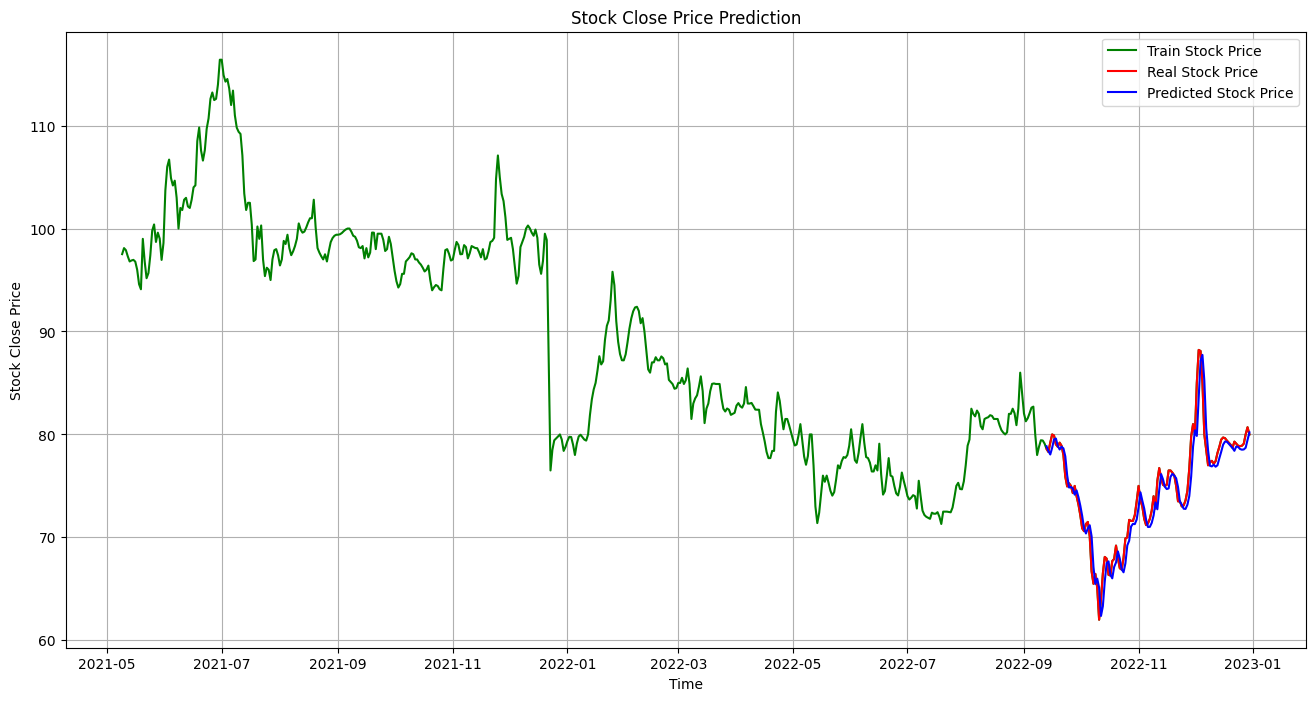

In [ ]:
# import matplotlib.pyplot as plt

# # train_data, test_data = stock_cleaned[0:int(len(stock_cleaned)*0.9)], stock_cleaned[int(len(stock_cleaned)*0.9):]
# train_arima_close = train_data['close']
# test_arima_close = test_data['close']

# # train_arima_close ,  test_arima_close =  train_test_split( stock_cleaned['Daily_Returns'])

# plt.figure(figsize=(16,8))
# plt.plot( train_arima_close.index[-600:], train_arima_close.tail(600), color='green', label = 'Train Stock Price')
# plt.plot(test_data.index,test_arima_close, color = 'red', label = 'Real Stock Price')
# plt.plot(test_data.index, predictions_close, color = 'blue', label = 'Predicted Stock Price')
# plt.title('Netflix Stock Price Prediction')
# plt.xlabel('Time')
# plt.ylabel('Netflix Stock Price')
# plt.legend()
# plt.grid(True)
# plt.savefig('arima_model.pdf')
# plt.show()

i = visualization_result(test_data['close'],predictions_close,stock_cleaned['close'],title ="Close Price",save="arima_model.pdf")


In [ ]:
i

<module 'matplotlib.pyplot' from 'e:\\Program Files\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [ ]:
result_close_df = evaluate_model(test_data['close'], predictions_close)
print(result_close_df)

      Metric     Value
0        MSE  2.278444
1        MAE  1.079958
2       RMSE  1.509452
3  R-squared  0.910715


In [ ]:
# import itertools
# import pandas as pd
# import numpy as np
# import statsmodels.api as sm

# p = d = q = range(0, 5)

# pdq = list(itertools.product(p, d, q))
# import warnings
# warnings.filterwarnings("ignore")
# best_aic = np.inf
# best_pdq = None

# for param in pdq:
#     try:
#         mod = sm.tsa.ARIMA(stock_cleaned["Daily_Returns"], order=param)
#         results = mod.fit()
#         print(f"ARIMA({param}) - AIC : {results.aic}")
#         if results.aic < best_aic:
#             best_aic = results.aic
#             best_pdq = param
#     except:
#         continue

# print(f"Best AIC: {best_aic}")
# print(f"Best (p, d, q): {best_pdq}")

